In [108]:
# Importa todas as bibliotecas necessárias
%matplotlib inline
import csv
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import pandas as pd
from babs_datacheck import question_3
from babs_visualizations import usage_stats, usage_plot
from IPython.display import display

# Análise da Bay Area Bike Share

## Introdução

> **Dica**: Seções citadas como esta fornecerão instruções úteis sobre como navegar e usar um notebook do iPython.

[Bay Area Bike Share](http://www.bayareabikeshare.com/) é uma empresa que oferece aluguel de bicicletas on-demand para clientes em San Francisco, Redwood City, Palo Alto, Mountain View e San Jose. Os usuários podem desbloquear bicicletas de uma variedade de estações em cada cidade, e devolvê-las em qualquer estação dentro da mesma cidade. Os usuários pagam o serviço por meio de assinatura anual ou pela compra de passes de 3 dias ou 24 horas. Os usuários podem fazer um número ilimitado de viagens. Viagens com menos de trinta minutos de duração não têm custo adicional; Viagens mais longas incorrem em taxas de horas extras.

Neste projeto, você vai se colocar no lugar de um analista de dados realizando uma análise exploratória sobre os dados. Você vai dar uma olhada em duas das principais partes do processo de análise de dados: limpeza de dados e análise exploratória. Mas antes que você comece a olhar os dados, pense algumas perguntas que você pode querer fazer sobre os dados. Considere, por exemplo, se você estivesse trabalhando para Bay Area Bike Share: que tipo de informação você gostaria de saber a fim de tomar decisões de negócios mais inteligentes? Ou você pode pensar se você fosse um usuário do serviço de compartilhamento de bicicletas. Que fatores podem influenciar a maneira como você gostaria de usar o serviço?

# Sobre este projeto

Este é o seu primeiro projeto com a Udacity. Queremos fazer com que você treine os conhecimentos aprendidos durante o curso e que entenda algumas das dificuldades que pode ter quando for aplicar os mesmos. 

Os principais pontos que serão verificados neste trabalho:

- Criação de dicionários e mapeamento de variáveis
- Uso de lógica com o `if`
- Manipulação de dados e criação de gráficos simples com o `Pandas`

*Como conseguir ajuda*: Sugerimos que tente os seguintes canais, nas seguintes ordens:

| Tipo de dúvida\Canais         	| Google 	| Fórum 	| Slack 	| Email 	|
|-------------------------------	|--------	|-------	|-------	|-------	|
| Programação Pyhon e Pandas    	| 1      	| 2     	| 3     	|       	|
| Requisitos do projeto         	|        	| 1     	| 2     	| 3     	|
| Partes específicas do Projeto 	|        	| 1     	| 2     	| 3     	|

Os endereços dos canais são:

- Fórum: https://discussions.udacity.com/c/ndfdsi-project
- Slack: [udacity-br.slack.com](https://udacity-br.slack.com/messages/C5MT6E3E1)
- Email: data-suporte@udacity.com

**Espera-se que o estudante entregue este relatório com:**

- Todos os TODO feitos, pois eles são essenciais para que o código rode corretamente
- Todas as perguntas respondidas. Elas estão identificadas como PERGUNTA em letras grandes.

Para entregar este projeto, vá a [sala de aula](https://classroom.udacity.com/nanodegrees/nd110/parts/05e3b1e2-ff23-488f-aaec-caba12ad8ed3/modules/519425b3-ee26-4ecd-a952-f689decef51c/lessons/47133342-a203-4df9-9b9e-69b04408e089/project) e submeta o seu `.ipynb` e um pdf, zipados.

# Pergunta 1
Escreva pelo menos duas perguntas que você acha que poderiam ser respondidas usando os dados.

**Resposta**: As principais perguntas a serem feitas são:

Em qual cidade encontra a maior parte dos usuário?

Existe alguma tendência quanto ao quando eles usam?

Qual o perfil das pessoas que usam?


## Usando visualizações para comunicar resultados em dados

Como um analista de dados, a capacidade de comunicar eficazmente resultados é uma parte fundamental do trabalho. Afinal, sua melhor análise é tão boa quanto sua capacidade de comunicá-la.

Em 2014, Bay Area Bike Share realizou um [Open Data Challenge](http://www.bayareabikeshare.com/datachallenge-2014) para incentivar os analistas de dados a criar visualizações com base em seu conjunto de dados aberto. Você criará suas próprias visualizações neste projeto, mas primeiro, dê uma olhada no [vencedor de inscrições para Melhor Análise](http://thfield.github.io/babs/index.html) de Tyler Field. Leia todo o relatório para responder à seguinte pergunta:

# Pergunta 2
Que visualizações você acha que fornecem as idéias mais interessantes? Você é capaz de responder a uma das perguntas identificadas acima com base na análise de Tyler? Por que ou por que não? 

Crie duas visualizações que forneçam idéias interessantes e que respondam alguma das perguntas da análise de Tyler.

** Resposta **: A análise de tyler foi muito bem feita, no gráfico "System-wide Rides per Day" do Tyler ele consegue responder "Existe alguma tendência quanto ao quando eles usam?", gráfico abaixo:
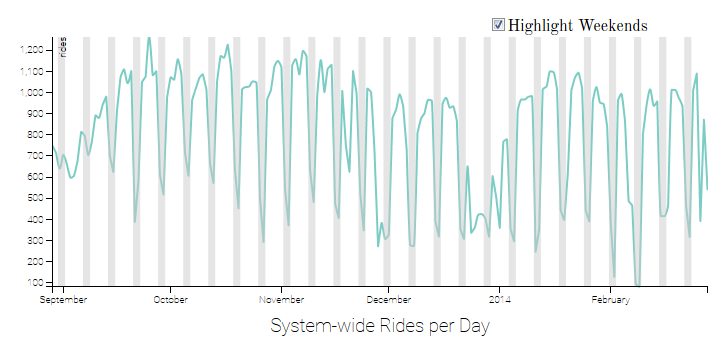

No gráfico assima conseguimos visualizar uma queda notavel de viagens nos finais de semana, mostrando uma tendência de uso no meio da semana, com este gráfico fica possivel fazer uma dedução primária que o serviço de Bike Share é utilizado por trabalhadores e/ou estudantes como meio de transporte no dia a dia.


Já no gráfico a seguir ele procura o perfil dos usuários, e consegue responder a pergunta "Qual o perfil das pessoas que usam?": 
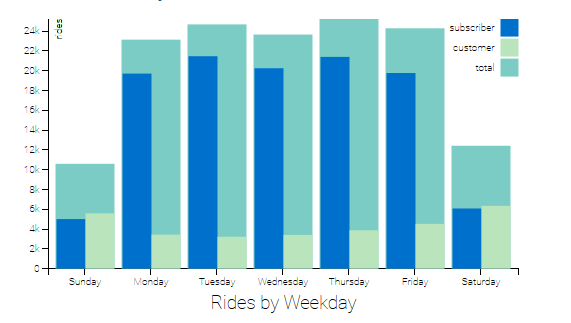

O gráfico 2 mostra uma analise mais focada no perfil de usuário do serviço prosseguindo com a analise do gráfico 1:
No meio da semana, Monday até Friday, o perfil "Subscriber" possui uma maioria esmagadora, mas nos fins de semana o perfil "Customer" aumenta em média 2 vezes o número de viagens, superando por uma pequena margem o perfil "Subscriber".

Fazendo uma analise conjunta dos 2 gráficos é possivel ter uma noção básica do perfil dos usuários e suas tendências de uso.
Subscriber = trabalhadores e/ ou estudantes.
Customer = Usuários de fins de semana.

# Pergunta 2.1

Quais são as perguntas que foram respondidas com suas visualizações? Porque você as escolheu?

** Resposta **: Neste projeto vão ser respondidas todas perguntas levantadas acima, com enfâse em encontrar tendências.

## Data Wrangling (Limpeza de Dados)

Agora é a sua vez de explorar os dados. Os [dados abertos](http://www.bayareabikeshare.com/open-data) do Ano 1 e do Ano 2 da página Bay Area Bike Share já foram fornecidos com os materiais do projeto; você não precisa baixar nada extra. O dado vem em três partes: a primeira metade do Ano 1 (arquivos a partir de `201402`), a segunda metade do Ano 1 (arquivos a partir de `201408`) e todo o Ano 2 (arquivos a partir de `201508`). Existem três arquivos de dados principais associados a cada parte: dados de viagem que mostram informações sobre cada viagem no sistema (`*_trip_data.csv`), informações sobre as estações no sistema (`*_station_data.csv`) e dados meteorológicos diários para cada cidade no sistema (`*_weather_data.csv`).


Ao lidar com muitos dados, pode ser útil começar trabalhando com apenas uma amostra dos dados. Desta forma, será muito mais fácil verificar se nossos passos da limpeza de dados (Data Wrangling) estão funcionando, pois nosso código demorará menos tempo para ser concluído. Uma vez que estamos satisfeitos com a forma como funcionam as coisas, podemos configurar o processo para trabalhar no conjunto de dados como um todo.

Uma vez que a maior parte dos dados está contida na informação de viagem, devemos segmentar a procura de um subconjunto dos dados da viagem para nos ajudar a seguir em frente. Você começará olhando apenas o primeiro mês dos dados da viagem de bicicleta, de 2013-08-29 a 2013-09-30. O código abaixo selecionará os dados da primeira metade do primeiro ano, então escreverá o valor do primeiro mês de dados para um arquivo de saída. Este código explora o fato de que os dados são classificados por data (note que os dois primeiros dias são classificados por tempo de viagem, em vez de serem completamente cronológicos).

Primeiro, carregue todos os pacotes e funções que você usará em sua análise executando a primeira célula de código abaixo. Em seguida, execute a segunda célula de código para ler um subconjunto do primeiro arquivo de dados de viagem e escrever um novo arquivo contendo apenas o subconjunto em que inicialmente estamos interessados.

> **Dica**: Você pode executar uma célula de código ou renderizar um texto em Markdown clicando na célula e usando o atalho do teclado **Shift** + **Enter** ou **Shift** + **Return**. Alternativamente, uma célula de código pode ser executada usando o botão **Play** na barra de ferramentas (a cima no IPython Notebook) depois de selecioná-la. Enquanto a célula estiver em execução, você verá um asterisco na mensagem à esquerda da célula, ou seja, `In [*]:`. O asterisco mudará para um número para mostrar que a execução foi concluída, Ex: `In [1]`. Se houver saída, ele aparecerá como `Out [1]:`, com um número apropriado para coincidir com o número de "In".

In [75]:
# definição dos arquivos
file_in  = '201402_trip_data.csv'
file_out = '201309_trip_data.csv'

with open(file_out, 'w') as f_out, open(file_in, 'r') as f_in:
    # configura o leitor de csv
    in_reader = csv.reader(f_in)
    out_writer = csv.writer(f_out)

    # escreve os dados no arquivo de saída até que a data limite seja atingida
    while True:
        datarow = next(in_reader)
        # data de início de das viagens na terceira coluna no formato 'm/d/yyyy HH:MM'
        if datarow[2][:9] == '10/1/2013':
            break
        out_writer.writerow(datarow)

### Condensando os Dados de Viagem

O primeiro passo é analisar a estrutura do conjunto de dados para ver se há alguma limpeza de dados que devemos realizar. A célula abaixo irá ler o arquivo de dados amostrado que você criou na célula anterior. Você deve imprimir as primeiras linhas da tabela.

In [174]:
sample_data = pd.read_csv('201309_trip_data.csv')

# TODO: escreva o código para visualizar as primeiras linhas

Nesta exploração, vamos nos concentrar nos fatores nos dados da viagem que afetam o número de viagens realizadas. Vamos focar em algumas colunas selecionadas: a duração da viagem (trip duration), hora de início (start time), terminal inicial (start terminal), terminal final (end terminal) e tipo de assinatura. O tempo de início será dividido em componentes de ano, mês e hora. Também adicionaremos uma coluna para o dia da semana e resumiremos o terminal inicial e final para ser a _cidade_ de início e fim.

Vamos primeiro abordar a última parte do processo de limpeza. Execute a célula de código abaixo para ver como as informações da estação estão estruturadas e observe como o código criará o mapeamento estação-cidade. Observe que o mapeamento da estação está configurado como uma função, `create_station_mapping()`. Uma vez que é possível que mais estações sejam adicionadas ou removidas ao longo do tempo, esta função nos permitirá combinar as informações da estação em todas as três partes dos nossos dados quando estivermos prontos para explorar tudo.

In [85]:
# Mostra as primeiras linhas do arquivo de dados das estações
station_info = pd.read_csv('201402_station_data.csv')
station_info.head()

,station_id,name,lat,long,dockcount,landmark,installation
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


Preencha a função abaixo de forma que a função retorne um mapeamento entre o id da estação (`station_id`) e a cidade em que ela se encontra (`landmark`).

In [11]:
# esta função será usada mais tarde para criar o mapeamento entre station e cidade
def create_station_mapping(station_data):
    """
    Cria um mapeamento (tambémm conhecido como de-para) entre a estação 
    e a cidade
    """
    # TODO: Inicie esta variável de maneira correta.
    station_map = {}
    for data_file in station_data:
        with open(data_file, 'r') as f_in:
            # configura o objeto csv reader - note que está sendo usado o DictReader,
            # que usa a primeira linha do arquivo como cabeçalho e cria as chaves
            # do dicionário com estes valores.
            weather_reader = csv.DictReader(f_in)

            for row in weather_reader:
                # TODO: faça o mapeamento aqui
                station_map[row['station_id']] = row['landmark']
    return station_map

Você pode agora usar o mapeamento para condensar as viagens para as colunas selecionadas acima. Isto acontecerá na função abaixo `summarise_data()`. Nela o módulo `datetime` é usado para fazer o **p**arse do tempo (timestamp) em formato de strings no arquivo original para um objeto usando a função `strptime`. Este objeto permitirá a conversão para outros **f**ormatos de datas usando a função `strftime`. O objeto possui também outras funções que facilitam a manipulação dos dados. Veja [este tutorial](http://usandopython.com.br/manipulando-data-hora-python-datetime/) para entender um pouco melhor como trabalhar com a biblioteca.

Você precisa concluir duas tarefas para completar a função `summarise_data()`. Inicialmente, você deverá realizar a operação de converter a duração das viagens de segundos para minutos. Esta é muito fácil, pois existem 60 segundos em um minuto!

Na sequência, você deve criar colunas para o ano, mês, hora e dia da semana. Verifique o tutorial acima ou a [documentação para o objeto de datetime no módulo datetime](https://docs.python.org/2/library/datetime.html#datetime-objects). 

** TODO: Encontre os atributos e métodos necessários para poder completar o código abaixo **

*Dica*: Você pode abrir uma nova caixa para testar um pedaço do código ou verificar uma variável que seja global. Caso ela esteja dentro da função, você também pode usar o comando `print()` para imprimi-la e ajudar no Debug.

In [12]:
def summarise_data(trip_in, station_data, trip_out):
    """
    Esta função recebe informações de viagem e estação e produz um novo
    arquivo de dados com um resumo condensado das principais informações de viagem.Os 
    argumentos trip_in e station_data serão listas de arquivos de dados para
    as informações da viagem e da estação enquanto trip_out especifica o local
    para o qual os dados sumarizados serão escritos.
    """
    # gera o dicionário de mapeamento entre estações e cidades
    station_map = create_station_mapping(station_data)
    
    with open(trip_out, 'w') as f_out:
        # configura o objeto de escrita de csv       
        out_colnames = ['duration', 'start_date', 'start_year',
                        'start_month', 'start_hour', 'weekday',
                        'start_city', 'end_city', 'subscription_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        for data_file in trip_in:
            with open(data_file, 'r') as f_in:
                # configura o leitor do csv
                trip_reader = csv.DictReader(f_in)

                # processa cada linha lendo uma a uma
                for row in trip_reader:
                    new_point = {}
                    
                    # converte a duração de segundos para minutos.
                    ### TODO: Pergunta 3a: Adicione uma operação matemática       ###
                    ### para converter a duração de segundos para minutos.  ###
                    new_point['duration'] = float(row['Duration'])/60
                    
                    # reformate strings com datas para múltiplas colunas
                    ### TODO: Pergunta 3b: Preencha os __ abaixo para criar os        ###
                    ### campos experados nas colunas (olhe pelo nome da coluna) ###
                    trip_date = datetime.strptime(row['Start Date'], '%m/%d/%Y %H:%M')
                    new_point['start_date']  = trip_date.strftime('%Y-%m-%d')
                    new_point['start_year']  = trip_date.strftime('%Y')
                    new_point['start_month'] = trip_date.strftime('%m')
                    new_point['start_hour']  = trip_date.strftime('%H')
                    new_point['weekday']     = trip_date.strftime('%a')
                    
                    # TODO: mapeia o terminal de inicio e fim com o a cidade de inicio e fim
                    new_point['start_city'] = station_map[row['Start Terminal']]
                    new_point['end_city'] = station_map[row['End Terminal']]
                    
                    # TODO: existem dois nomes diferentes para o mesmo campo. Trate cada um deles.
                    if 'Subscription Type' in row:
                        new_point['subscription_type'] = row['Subscription Type']
                    else:
                        new_point['subscription_type'] = row['Subscriber Type']

                    # escreve a informação processada para o arquivo de saída.
                    trip_writer.writerow(new_point)

# Criando tabela de Tempo 

In [2]:
def create_data_weather(weather):
    weather['PDT'] = pd.to_datetime(weather.PDT)
    weather['start_date']  = weather['PDT'].dt.strftime('%Y-%m-%d')
    weather['start_year']  = weather['PDT'].dt.strftime('%Y')
    weather['start_month'] = weather['PDT'].dt.strftime('%m')
    weather['weekday']     = weather['PDT'].dt.strftime('%a')
    weather =  weather.drop('PDT', 1)
    return weather

In [3]:
weather01 = pd.read_csv('201402_weather_data.csv')
weather02 = pd.read_csv('201408_weather_data.csv')
weather03 = pd.read_csv('201508_weather_data.csv')

In [4]:
weather01.columns = ['PDT', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF', 'Max Dew PointF',
 'MeanDew PointF', 'Min DewpointF', 'Max Humidity', ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn',
 ' Mean Sea Level PressureIn', ' Min Sea Level PressureIn', ' Max VisibilityMiles', ' Mean VisibilityMiles',
' Min VisibilityMiles',
 ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH',
 'PrecipitationIn', ' CloudCover', ' Events', ' WindDirDegrees', 'Zip']

In [5]:
tempo = [weather01, weather02, weather03]
weather = pd.concat(tempo)

In [6]:
create_data_weather(weather)

,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,...,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,Zip,start_date,start_year,start_month,weekday
0,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,...,28.0,0,4.0,NaN,286.0,94107,2013-08-29,2013,08,Thu
1,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,30.05,...,35.0,0,2.0,NaN,291.0,94107,2013-08-30,2013,08,Fri
2,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,30.00,...,31.0,0,4.0,NaN,284.0,94107,2013-08-31,2013,08,Sat
3,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,29.96,...,29.0,0,4.0,NaN,284.0,94107,2013-09-01,2013,09,Sun
4,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,29.97,...,30.0,0,6.0,NaN,277.0,94107,2013-09-02,2013,09,Mon
5,73.0,67.0,60.0,59.0,56.0,51.0,84.0,65.0,46.0,30.02,...,31.0,0,2.0,NaN,276.0,94107,2013-09-03,2013,09,Tue
6,74.0,68.0,61.0,59.0,57.0,56.0,90.0,72.0,53.0,30.05,...,35.0,0,4.0,NaN,269.0,94107,2013-09-04,2013,09,Wed
7,72.0,66.0,60.0,57.0,56.0,54.0,90.0,74.0,57.0,30.04,...,37.0,0,3.0,NaN,270.0,94107,2013-09-05,2013,09,Thu
8,85.0,71.0,56.0,57.0,51.0,45.0,86.0,58.0,29.0,30.00,...,28.0,0,0.0,NaN,287.0,94107,2013-09-06,2013,09,Fri
9,88.0,73.0,58.0,64.0,54.0,46.0,86.0,59.0,31.0,29.88,...,25.0,0,1.0,NaN,305.0,94107,2013-09-07,2013,09,Sat


# Pergunta 3: 
Execute o bloco de código abaixo para chamar a função `summarise_data()` que você terminou na célula acima. Ela usará os dados contidos nos arquivos listados nas variáveis `trip_in` e `station_data` e escreverá um novo arquivo no local especificado na variável `trip_out`. Se você executou a limpeza de dados corretamente, o bloco de código abaixo imprimirá as primeiras linhas do DataFrame e uma mensagem que verificando se as contagens de dados estão corretas.

In [91]:
# processe os dados usando a função criada acima
station_data = ['201402_station_data.csv']
trip_in = ['201309_trip_data.csv']
trip_out = '201309_trip_summary.csv'
summarise_data(trip_in, station_data, trip_out)

In [92]:
# Carregue os dados novamente mostrando os dados
## TODO: Complete o código para leitura dos dados no arquivo criado na função acima
sample_data = pd.read_csv(trip_out)
display(sample_data.head())

,duration,start_date,start_year,start_month,start_hour,weekday,start_city,end_city,subscription_type
0,1.050000,2013-08-29,2013,8,14,Thu,San Francisco,San Francisco,Subscriber
1,1.166667,2013-08-29,2013,8,14,Thu,San Jose,San Jose,Subscriber
2,1.183333,2013-08-29,2013,8,10,Thu,Mountain View,Mountain View,Subscriber
3,1.283333,2013-08-29,2013,8,11,Thu,San Jose,San Jose,Subscriber
4,1.383333,2013-08-29,2013,8,12,Thu,San Francisco,San Francisco,Subscriber


In [93]:
# Verifica o DataFrame contando o número de pontos de dados com as características de 
# tempo corretas.
question_3(sample_data)

Todas as contagens estão como esperadas.


> **Dica**: se você salvar um notebook do jupyter, a saída dos blocos de código em execução também será salva. No entanto, o estado do seu arquivo será reiniciado uma vez que uma nova sessão será iniciada. Certifique-se de que você execute todos os blocos de código necessários da sessão anterior para restabelecer variáveis e funções antes de continuar de onde você deixou na última vez.

## Análise Exploratória de Dados 

Agora que você tem alguns dados salvos em um arquivo, vejamos algumas tendências iniciais nos dados. Algum código já foi escrito para você no script [babs_visualizations.py](babs_visualizations.py) para ajudar a resumir e visualizar os dados; Isso foi importado como as funções `usage_stats()` e `usage_plot()`. Nesta seção, vamos percorrer algumas das coisas que você pode fazer com as funções, e você usará as funções para você mesmo na última parte do projeto. Primeiro, execute a seguinte célula para carregar os dados. Depois preencha a célula abaixo com os comandos para verificar os dados básicos sobre os dados.

In [95]:
trip_data = pd.read_csv('201309_trip_summary.csv')

In [97]:
duration_mean = trip_data['duration'].mean()
duration_qtiles = trip_data['duration'].quantile([.25, .5, .75]).as_matrix()
# TODO: preencha os campos com os dados de acordo com o print
print('Existem {:d} pontos no conjunto de dados'.format(trip_data.shape[0]))
print('A duração média das viagens foi de {:.2f} minutos'.format(duration_mean))
print('A mediana das durações das viagens foi de {:.2f} minutos'.format(duration_qtiles[1]))

# TODO: verificando os quartis

print('25% das viagens foram mais curtas do que {:.2f} minutos'.format(duration_qtiles[0]))
print('25% das viagens foram mais compridas do que {:.2f} minutos'.format(duration_qtiles[2]))

Existem 27345 pontos no conjunto de dados
A duração média das viagens foi de 27.60 minutos
A mediana das durações das viagens foi de 10.72 minutos
25% das viagens foram mais curtas do que 6.82 minutos
25% das viagens foram mais compridas do que 17.28 minutos


In [98]:
# execute este campo para verificar os seu processamento acima.
usage_stats(trip_data)

Existem 27345 pontos no conjunto de dados
A duração média das viagens foi de 27.60 minutos
A mediana das durações das viagens foi de 10.72 minutos
25% das viagens foram mais curtas do que 6.82 minutos
25% das viagens foram mais compridas do que 17.28 minutos


array([  6.81666667,  10.71666667,  17.28333333])

Você deve ver que há mais de 27.000 viagens no primeiro mês e que a duração média da viagem é maior do que a duração mediana da viagem (o ponto em que 50% das viagens são mais curtas e 50% são mais longas). Na verdade, a média é maior que as durações de 75% das viagens mais curtas. Isso será interessante para ver mais adiante.

Vamos começar a ver como essas viagens são divididas por tipo de inscrição. Uma maneira fácil de construir uma intuição sobre os dados é traçá-los. 

Lembre-se que o Pandas possui maneiras de plotar os gráficos diretamente de um DataFrame. Para cada tipo de dados/análises se pode usar um tipo diferente de gráfico mais apropriado para a análise que se está fazendo.

Na caixa abaixo, faça um gráfico de viagens x tipo de subscrição do tipo barras.

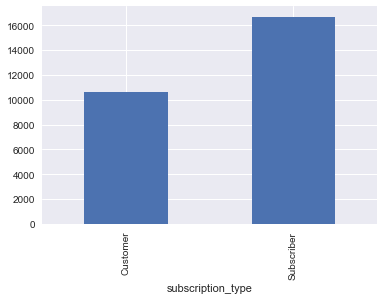

In [84]:
customers_types = trip_data.groupby('subscription_type')
customers_types.size().plot(kind='bar')

Para que você possa conferir se os seus gráficos estão corretos, usaremos a função `use_plot()`. O segundo argumento da função nos permite contar as viagens em uma variável selecionada, exibindo as informações em um gráfico. A expressão abaixo mostrará como deve ter ficado o seu gráfico acima.

>*Nota*: Perceba que provavelmente o seu gráfico não ficou exatamente igual, principalmente pelo título e pelo nome dos eixos. Lembre-se, estes são detalhes mas fazem toda a diferença quando você for apresentar os gráficos que você analisou. Neste Nanodegree não focaremos nestas questões, mas tenha em mente que ter os gráficos acertados é de extrema importância.

Parece que existe 50% mais viagens feitas por assinantes (subscribers) no primeiro mês do que outro tipos de consumidores. Vamos tentar uma outra variável. Como é a distribuição da duração das viagens (trip duration)?

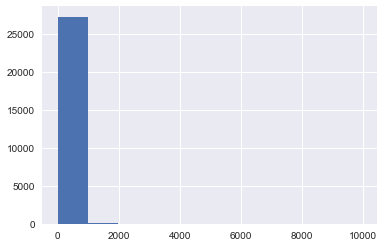

In [77]:
trip_data['duration'].hist()

Parece muito estranho, não é? Dê uma olhada nos valores de duração no eixo x. A maioria dos passeios deve ser de 30 minutos ou menos, uma vez que há taxas de excesso de tempo extra em uma única viagem. A primeira barra abrange durações de até 1000 minutos, ou mais de 16 horas. Com base nas estatísticas que obtivemos do `use_stats()`, deveríamos ter esperado algumas viagens com durações muito longas que levem a média a ser muito superior à mediana: o gráfico mostra isso de forma dramática, mas inútil.

Ao explorar os dados, muitas vezes você precisará trabalhar com os parâmetros da função de visualização para facilitar a compreensão dos dados. É aqui que os filtros vão ajudar você. Comecemos por limitar as  viagens de menos de 60 minutos.

(array([ 6980.,  9657.,  4664.,  2198.,  1022.,   425.,   240.,   153.,
          132.,   132.]),
 array([  1.        ,   6.88833333,  12.77666667,  18.665     ,
         24.55333333,  30.44166667,  36.33      ,  42.21833333,
         48.10666667,  53.995     ,  59.88333333]),
 <a list of 10 Patch objects>)

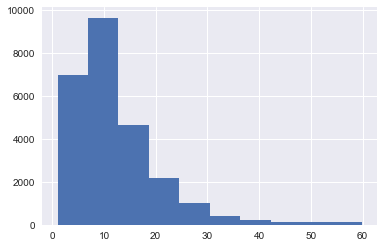

In [82]:
x = trip_data['duration']
x_filt = x[trip_data['duration'] < 60]

plt.hist(x_filt)

Isso está bem melhor! Você pode ver que a maioria das viagens têm menos de 30 minutos de duração, mas que você pode fazer mais para melhorar a apresentação. Uma vez que a duração mínima não é 0, a barra da esquerda está ligeiramente acima de 0. Nós queremos saber onde existe um limite perto dos 30 minutos, então ficará mais agradável se tivermos tamanhos de intervalos (bin sizes) e limites dos intervalos que correspondam a alguns minutos. 

Felizmente, o Pandas e o Matplotlib te dão a opção de resolver ester problemas. Uma das maneiras de fazê-lo é definindo qual o intervalo no eixo x (parâmetro range) e quantos intervalos desejamos (bins).

No campo abaixo, faça o ajuste do gráfico para que os limites das barras se encontrem nas extremidades e que as barras tenham tamanho 5 (0, 5, 10, 15, etc). Se precisar, use a [documentação](http://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hist.html#matplotlib.axes.Axes.hist).

(1, 64.0)

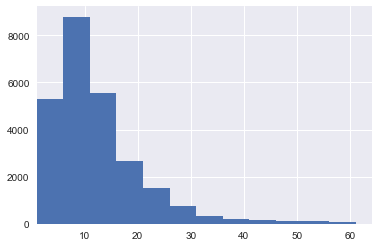

In [83]:
bins=np.arange(min(x_filt), max(x_filt) + 5, 5)
plt.hist(x_filt, bins=bins)
plt.xlim(xmin=1)

Pequenos ajustes como este podem ser pequenos mas fazem toda a diferença na entrega de um trabalho de qualidade e com atenção aos detalhes.


# Pergunta 4

Analise o histograma do exercicio anterior e responda:

Qual o intervalo de duração com maior quantidade de viagens?


**Reposta**: Considerando que temos 10 bins(barras), cada uma representando um intervalo de 5 minutos, o gráfico deixa claro que a maior quantidade de viagens possui entre 5-10 minutos.

# Pergunta 4.1
Qual viagem de 5 minutos de duração tem a maior quantidade de viagens? Aproximadamente quantas viagens foram feitas nesta faixa de tempo?

Dica: Identifique a viagens pela origem e destino, calcule quantas viagem de 5 minutos de duração foram realizadas para cada origem e destino.
       Após isso calcule o total de viagens com 5 minutos de duração.
 

**Reposta**: 
Total de viagens com o tempo menor ou igual a 5 minutos : 3493

Estação "Start" com maior quantidade de Retirada : Market at Sansome

Quantidade : 181

Estação "End" com maior quantidade de Retirada : Market at Sansome

Quantidade : 209

In [59]:
#Transformando a Coluna Duration em Boolean para poder conseguir somar o total, True = 1, False = 0, 
#Descobrindo assim a quantidade total de viagens com o mesmo tempo ou menor que 5 minutos
trip_station_data = pd.read_csv('201309_trip_data.csv')
trip_station_data['Duration']=trip_station_data['Duration'].apply(lambda x: x<300 )
trip_station_data.sum()


Trip ID                                                      627307678
Duration                                                          3493
Start Date           8/29/2013 14:138/29/2013 14:428/29/2013 10:168...
Start Station        South Van Ness at MarketSan Jose City HallMoun...
Start Terminal                                                 1537797
End Date             8/29/2013 14:148/29/2013 14:438/29/2013 10:178...
End Station          South Van Ness at MarketSan Jose City HallMoun...
End Terminal                                                   1539146
Bike #                                                        11984405
Subscription Type    SubscriberSubscriberSubscriberSubscriberSubscr...
dtype: object

In [60]:
#Jutando o Dataframe nas estações "Start" para poder somar
five_mine_start_station = trip_station_data.groupby('Start Station')
total_duration_start_station = five_mine_start_station.sum()

In [61]:
#Descobre qual a estação com o maior "Start"
total_duration_start_station['Duration'].argmax('Start Station')

'Market at Sansome'

In [69]:
#Verificando o Duration
total_duration_start_station.loc['Market at Sansome']


Trip ID           26229325.0
Duration               181.0
Start Terminal       85778.0
End Terminal         68128.0
Bike #              511962.0
Name: Market at Sansome, dtype: float64

In [68]:
#Verificando o Duration ambos 181
five_mine_start_station.sum().max()

Trip ID           35279746.0
Duration               181.0
Start Terminal       97230.0
End Terminal         94842.0
Bike #              738886.0
dtype: float64

In [63]:
#Jutando o Dataframe nas estações "End" para poder somar
five_mine_end_station = trip_station_data.groupby('End Station')
total_duration_end_station = five_mine_end_station.sum()

In [64]:
#Descobre qual a estação com o maior "End"
total_duration_end_station['Duration'].argmax('End Station')

'Market at Sansome'

In [65]:
#Verificando o Duration
total_duration_end_station.loc['Market at Sansome']

Trip ID           25403760.0
Duration               209.0
Start Terminal       66753.0
End Terminal         82005.0
Bike #              488523.0
Name: Market at Sansome, dtype: float64

In [71]:
#Verificando o Duration ambos 209
five_mine_end_station.sum().max()

Trip ID           40510876.0
Duration               209.0
Start Terminal      108119.0
End Terminal        109860.0
Bike #              839179.0
dtype: float64

## Fazendo suas Próprias Análises

Agora que você fez alguma exploração em uma pequena amostra do conjunto de dados, é hora de avançar e reunir todos os dados em um único arquivo e ver quais tendências você pode encontrar. O código abaixo usará a mesma função `summarise_data()` para processar dados. Depois de executar a célula abaixo, você terá processado todos os dados em um único arquivo de dados. Observe que a função não exibirá qualquer saída enquanto ele é executado, e isso pode demorar um pouco para ser concluído, pois você tem muito mais dados do que a amostra com a qual você trabalhou.

In [17]:
station_data = ['201402_station_data.csv',
                '201408_station_data.csv',
                '201508_station_data.csv' ]
trip_in = ['201402_trip_data.csv',
           '201408_trip_data.csv',
           '201508_trip_data.csv' ]
trip_out = 'babs_y1_y2_summary.csv'

# Esta função irá ler as informações das estações e das viagens
# e escreverá um arquivo processado com o nome trip_out
summarise_data(trip_in, station_data, trip_out)

Já que a função `summarise_data()` escreveu um arquivo de saída, a célula acima não precisa ser rodada novamente mesmo que este notebook seja fechado e uma nova sessão seja criada. Você pode simplesmente ler os dados novamente e fazer a exploração deste ponto (não esqueça de executar a parte das funções no começo do notebook caso esteja em uma nova sessão)

In [18]:
trip_data = pd.read_csv('babs_y1_y2_summary.csv')
display(trip_data.head())

,duration,start_date,start_year,start_month,start_hour,weekday,start_city,end_city,subscription_type
0,1.050000,2013-08-29,2013,8,14,Thu,San Francisco,San Francisco,Subscriber
1,1.166667,2013-08-29,2013,8,14,Thu,San Jose,San Jose,Subscriber
2,1.183333,2013-08-29,2013,8,10,Thu,Mountain View,Mountain View,Subscriber
3,1.283333,2013-08-29,2013,8,11,Thu,San Jose,San Jose,Subscriber
4,1.383333,2013-08-29,2013,8,12,Thu,San Francisco,San Francisco,Subscriber


#### Agora é a SUA vez de fazer a exploração do dataset (do conjunto de dados) completo.

Aproveite para fazer filtros nos dados e tentar encontrar padrões nos dados.

Explore algumas variáveis diferentes usando o mesmo racional acima e tome nota de algumas tendências que você encontra. Sinta-se livre para criar células adicionais se quiser explorar o conjunto de dados de outras maneiras ou de várias maneiras.

> **Dica**: para adicionar células adicionais a um notebook, você pode usar as opções "Inserir célula acima" (Insert Cell Above) e "Insert Cell Below" na barra de menu acima. Há também um ícone na barra de ferramentas para adicionar novas células, com ícones adicionais para mover as células para cima e para baixo do documento. Por padrão, as novas células são do tipo de código; Você também pode especificar o tipo de célula (por exemplo, Código ou Markdown) das células selecionadas no menu Cell ou no menu dropdown na barra de ferramentas.

Um feito com suas explorações, copie as duas visualizações que você achou mais interessantes nas células abaixo e responda as seguintes perguntas com algumas frases descrevendo o que você encontrou e por que você selecionou os números. Certifique-se de que você ajusta o número de caixas ou os limites da bandeja para que efetivamente transmitam os resultados dos dados. Sinta-se livre para complementar isso com quaisquer números adicionais gerados a partir de `use_stats()` ou coloque visualizações múltiplas para suportar suas observações.

Para ver alguns outros tipos de gráficos que o matplotlib (padrão do Pandas) possui, leia [este artigo](https://www.labri.fr/perso/nrougier/teaching/matplotlib/#other-types-of-plots). 

Para entender um pouco mais como e quais gráficos podem ser úteis, leia [este documento](https://www.tableau.com/sites/default/files/media/Whitepapers/which_chart_v6_ptb.pdf). Ele lhe dará um pouco de idéia de como mostrar os dados de forma mais acertada

In [101]:
usage_stats(trip_data)

Existem 669959 pontos no conjunto de dados
A duração média das viagens foi de 18.47 minutos
A mediana das durações das viagens foi de 8.62 minutos
25% das viagens foram mais curtas do que 5.73 minutos
25% das viagens foram mais compridas do que 12.58 minutos


array([  5.73333333,   8.61666667,  12.58333333])

In [102]:
trip_data.describe()

,duration,start_year,start_month,start_hour
count,669959.000000,669959.000000,669959.000000,669959.000000
mean,18.465831,2014.212691,6.476844,13.096118
std,370.923950,0.683857,3.276798,4.554510
min,1.000000,2013.000000,1.000000,0.000000
25%,5.733333,2014.000000,4.000000,9.000000
50%,8.616667,2014.000000,7.000000,13.000000
75%,12.583333,2015.000000,9.000000,17.000000
max,287840.000000,2015.000000,12.000000,23.000000


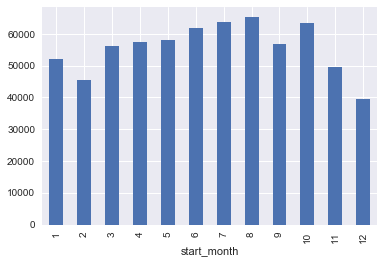

In [248]:
month = trip_data.groupby('start_month')
month.size().plot(kind='bar')


## Onde usam?

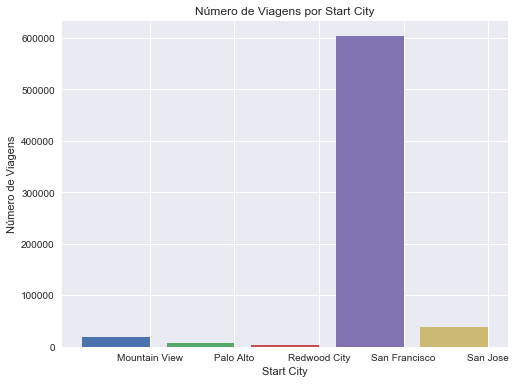

In [110]:
usage_plot(trip_data, 'start_city')

# Explorar os dados focando o tipo de usuário, Subscriber ou Customer


## Quantidade de viagens feitas por tipo de Subscribe

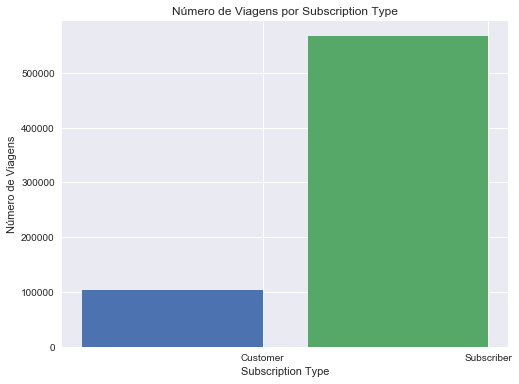

In [86]:
usage_plot(trip_data, 'subscription_type')

## Dados das viagens por tipo de Subscribe

Os gráficos abaixo mostram que os subscribers e os customenrs estão quase todos contidos em viagens de 1 hora ou menos, mas os customers estão mais destribuidos.

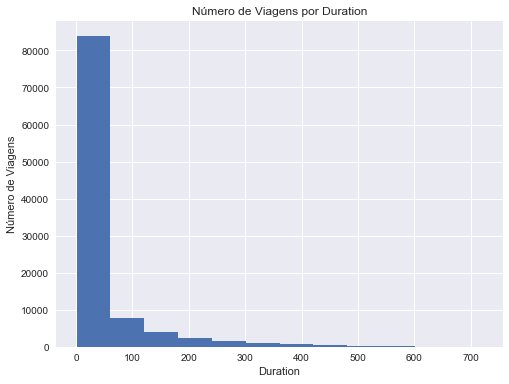

In [82]:
usage_plot(trip_data, 'duration', ['subscription_type == Customer','duration < 720'], bin_width = 60)

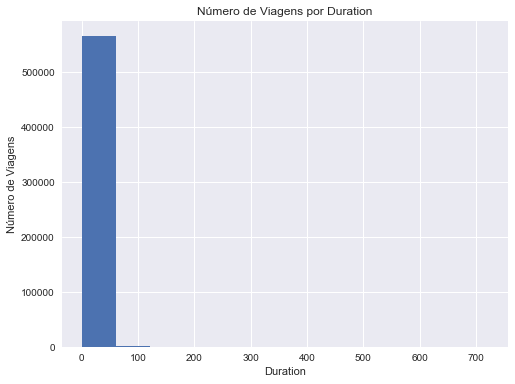

In [83]:
usage_plot(trip_data, 'duration', ['subscription_type == Subscriber','duration < 720'], bin_width = 60)

Podemos observar que embora Customers representem apenas 18% das viagens totais, em viagens com mais de 1 hora eles representam mais de 90% das viagens. 




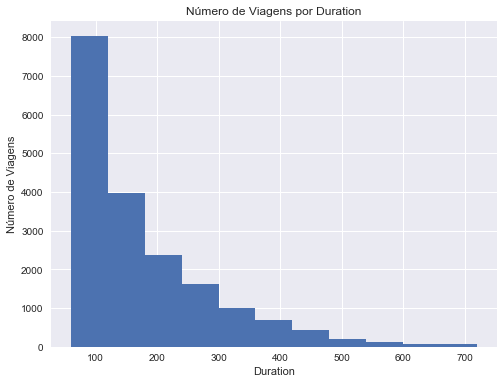

In [89]:
usage_plot(trip_data, 'duration', ['subscription_type == Customer','duration > 60', 'duration < 720'], bin_width = 60)

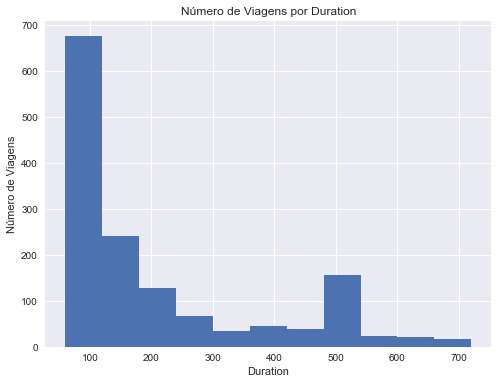

In [90]:
usage_plot(trip_data, 'duration', ['subscription_type == Subscriber','duration > 60', 'duration < 720'], bin_width = 60)

In [84]:
subs_trip_data = trip_data.groupby('subscription_type')
subs_trip_data.describe()

duration                                                    \
                      count       mean         std  min        25%        50%   
subscription_type                                                               
Customer           103213.0  65.862689  933.941497  1.0  10.966667  18.600000   
Subscriber         566746.0   9.834148   57.525599  1.0   5.383333   7.933333   

                                       start_hour              ...    \
                         75%       max      count       mean   ...     
subscription_type                                              ...     
Customer           38.816667  287840.0   103213.0  13.889946   ...     
Subscriber         11.100000   30876.5   566746.0  12.951550   ...     

                  start_month       start_year                                 \
                          75%   max      count         mean       std     min   
subscription_type                                                               
Customer                  9.0  12.0   103213.0  2014.054635  0.725522  2013.0   
Subscriber                9.0  12.0   566746.0  2014.241475  0.672004  2013.0   

                                                   
                      25%     50%     75%     max  
subscription_type                                  
Customer           2014.0  2014.0  2015.0  2015.0  
Subscriber         2014.0  2014.0  2015.0  2015.0  

[2 rows x 32 columns]

Baseado nos gráficos mostrados acima e na tabela(describe) podemos deduzir a tendência do uso das bicicletas por tipo de Subscriber e responder as perguntas levantadas no início do projeto.

Tipo de Subscription = Subscriber

Existem 566746 pontos no conjunto de dados

A duração média das viagens foi de 9.83 minutos

A mediana das durações das viagens foi de 7.93 minutos

25% das viagens foram mais curtas do que 5.383333 minutos

25% das viagens foram mais compridas do que 11.10 minutos

A maior viagem foi de 30876.5 minutos

Desvio padrão = 57.52

Podemos deduzir que o tipo de usuário "Subscriber" utiliza o o serviço de Bike Share como um dos modos principais de locomoção no dia - a - dia

Tipo de Subscription = Customer

Existem 103213 pontos no conjunto de dados

A duração média das viagens foi de 65.86 minutos

A mediana das durações das viagens foi de 18.60 minutos

25% das viagens foram mais curtas do que 10.96 minutos

25% das viagens foram mais compridas do que 38.81 minutos

A maior viagem foi de 287840 minutos

Desvio padrão = 933.94

Embora os dados: 'Mediana' e '25% mais curtas' não possuam uma grande diferença dos dados do 'Subscriber', os dados '25% mais longas', 'Média' e 'Desvio Padrão' mostra uma clara diferença do tipo de usuário que procura o serviço 'Customer', principalmente Média e o Desvio padrão que mostrão que mesmo 80% dos 'Customer' estarem em menos de 1 hora por viagem, os outros 20% possuem viagens tão grandes que conseguem levantar a média para mais de 1 hora, 1:05 hora, e o desvio padrão para 933.94.


## Dias das viagens feitas por tipo de Subscribe

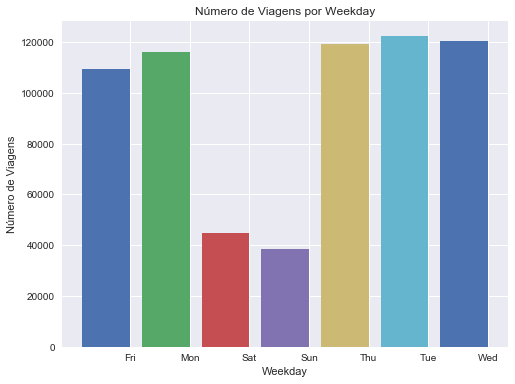

In [97]:
usage_plot(trip_data, 'weekday')

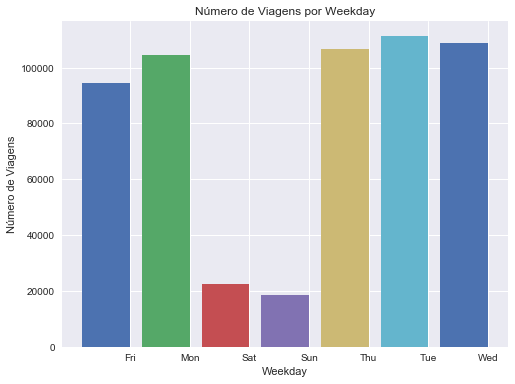

In [96]:
usage_plot(trip_data, 'weekday', ['subscription_type == Subscriber'])

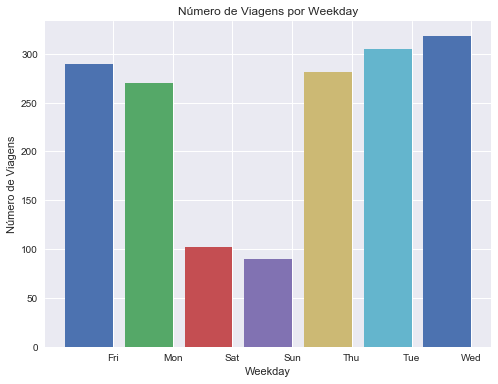

In [107]:
usage_plot(trip_data, 'weekday', ['subscription_type == Subscriber','duration > 60'])

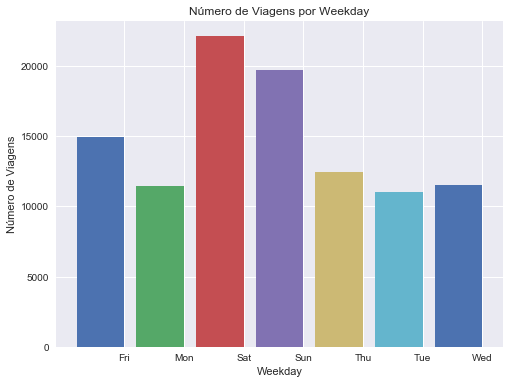

In [95]:
usage_plot(trip_data, 'weekday', ['subscription_type == Customer'])

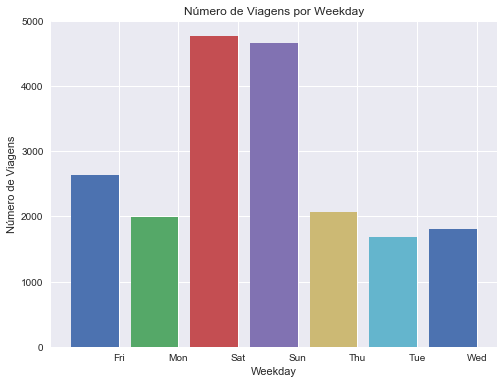

In [105]:
usage_plot(trip_data, 'weekday', ['subscription_type == Customer','duration > 60'])

Com os gráficos apresentando o uso por dia da semana aumenta a veracidade da dedução feita anteriormente.

Nos gráficos que apresentam o uso do 'Subscriber' em qualquer viagem e em apenas viagens com mais de 1 hora de duração: o uso do serviço cai drasticamente nos finais de semana que condiz com a dedução de uso diario como meio de transporte principal.

Os gráficos que apresentam o uso do 'Customer' em qualquer viagem e em apenas viagens com mais de 1 hora de duração: criam um perfil de "usuário de final de semana" para o 'Customer', algo que não era possivel de perceber apenas com os dados da dedução anterior.

## Conclusões

Parabéns pela conclusão do projeto! Esta é apenas uma amostragem do processo de análise de dados: gerando perguntas, limpando e explorando os dados. Normalmente, neste momento no processo de análise de dados, você pode querer tirar conclusões realizando um teste estatístico ou ajustando os dados a um modelo para fazer previsões. Há também muitas análises potenciais que podem ser realizadas se evoluirmos o código fornecido. Em vez de apenas olhar para o número de viagens no eixo de resultados, você pode ver quais recursos afetam coisas como a duração da viagem. Nós também não analisamos como os dados meteorológicos se encaixam no uso de bicicletas.

# Pergunta 6
Pense em um tópico ou campo de interesse onde você gostaria de poder aplicar as técnicas da ciência dos dados. O que você gostaria de aprender com o assunto escolhido?

**Responda**: Durante as aulas já pensava em várias utilidades para esse novo conhecimento, os principais foram:
no trabalho onde eu processo uma grande quantidade de demandas(erro, novos sistemas, evolutivas, etc) e em alguns dos jogos que eu jogo por possuir uma grande quantidade de informações que precisam ser processadas.

> **Dica**: se quisermos compartilhar os resultados de nossa análise com os outros, existe uma outra opção que não é enviar o arquivo jupyter Notebook (.ipynb). Também podemos exportar a saída do Notebook de uma forma que pode ser aberto mesmo para aqueles sem o Python instalado. No menu **File** na parte superior esquerda, vá para o submenu **Download as**. Você pode então escolher um formato diferente que pode ser visto de forma mais geral, como HTML (.html) ou PDF (.pdf). Você pode precisar de pacotes adicionais ou software para executar essas exportações.